In [1]:
# Importing necessary libraries
import os
import numpy as np
import seaborn as sns
from shutil import copyfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define your data directory
data_dir = "/kaggle/input/monkeyspeciesimage"

# Define the directory for your split data
split_data_dir = "/kaggle/working/"

In [3]:
# Create train, test, and validation directories
train_dir = os.path.join(split_data_dir, "train")
test_dir = os.path.join(split_data_dir, "test")
val_dir = os.path.join(split_data_dir, "val")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [4]:
# Loop through each class
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    # Create class directories in train, test, and validation
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    
    # Split the data into train, test, and validation
    train_class_path, temp_class_path = train_test_split(os.listdir(class_path), test_size=0.4, random_state=42)
    test_class_path, val_class_path = train_test_split(temp_class_path, test_size=0.5, random_state=42)
    
    # Copy images to train directory
    for img in train_class_path:
        copyfile(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    
    # Copy images to test directory
    for img in test_class_path:
        copyfile(os.path.join(class_path, img), os.path.join(test_class_dir, img))

    # Copy images to validation directory
    for img in val_class_path:
        copyfile(os.path.join(class_path, img), os.path.join(val_class_dir, img))

In [5]:
# Paths to training, testing, and validation data
train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"
val_dir = "/kaggle/working/val"

# Checking if the classes match in all directories
set(os.listdir(train_dir)) == set(os.listdir(test_dir)) == set(os.listdir(val_dir))

True

In [6]:
# Paths to training, testing, and validation data
train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"
val_dir = "/kaggle/working/val"

In [7]:
# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for the validation and test sets (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Create data generators with a target size of 256x256 and batch size 64
target_size = (100, 100)
batch_size = 32

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5810 images belonging to 10 classes.
Found 1942 images belonging to 10 classes.
Found 1938 images belonging to 10 classes.


In [10]:
# Build an improved Sequential model
model = Sequential()

# Convolutional layer 1 with 32 filters, each of size (3,3), using ReLU activation
# Input shape is set to (100, 100, 3) for a 100x100 RGB image
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))  # Layer 1

# Batch Normalization to improve convergence and reduce overfitting
model.add(BatchNormalization())  # Layer 2

# MaxPooling layer 1 with pool size (2,2) to downsample the spatial dimensions
model.add(MaxPooling2D((2, 2)))  # Layer 3

# Convolutional layer 2 with 128 filters and (3,3) filter size, using ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))  # Layer 4

# Batch Normalization
model.add(BatchNormalization())  # Layer 5

# MaxPooling layer 2
model.add(MaxPooling2D((2, 2)))  # Layer 6

# Convolutional layer 3 with 256 filters and (3,3) filter size, using ReLU activation
model.add(Conv2D(256, (3, 3), activation='relu'))  # Layer 7

# Batch Normalization
model.add(BatchNormalization())  # Layer 8

# MaxPooling layer 3
model.add(MaxPooling2D((2, 2)))  # Layer 9

# Convolutional layer 4 with 512 filters and (3,3) filter size, using ReLU activation
model.add(Conv2D(512, (3, 3), activation='relu'))  # Layer 10

# Batch Normalization
model.add(BatchNormalization())  # Layer 11

# MaxPooling layer 4
model.add(MaxPooling2D((2, 2)))  # Layer 12

# Convolutional layer 5 with 1024 filters and (3,3) filter size, using ReLU activation
model.add(Conv2D(1024, (3, 3), activation='relu'))  # Layer 13

# Batch Normalization
model.add(BatchNormalization())  # Layer 14

# MaxPooling layer 5
model.add(MaxPooling2D((2, 2)))  # Layer 15

# Flatten layer to convert the 3D output to 1D for the fully connected layers
model.add(Flatten())  # Layer 16

# Dense (fully connected) layer 1 with 2048 neurons and ReLU activation
model.add(Dense(2048, activation='relu'))  # Layer 17

# Batch Normalization
model.add(BatchNormalization())  # Layer 18

# Dropout layer to prevent overfitting by randomly dropping 50% of the neurons during training
model.add(Dropout(0.5))  # Layer 19

# Dense layer 2 with 1024 neurons and ReLU activation
model.add(Dense(1024, activation='relu'))  # Layer 20

# Batch Normalization
model.add(BatchNormalization())  # Layer 21

# Output layer with 6 neurons (assuming 6 classes) and softmax activation for multiclass classification
model.add(Dense(10, activation='softmax'))  # Layer 22

# Compile the model with Adam optimizer, a reduced learning rate (0.0001), categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

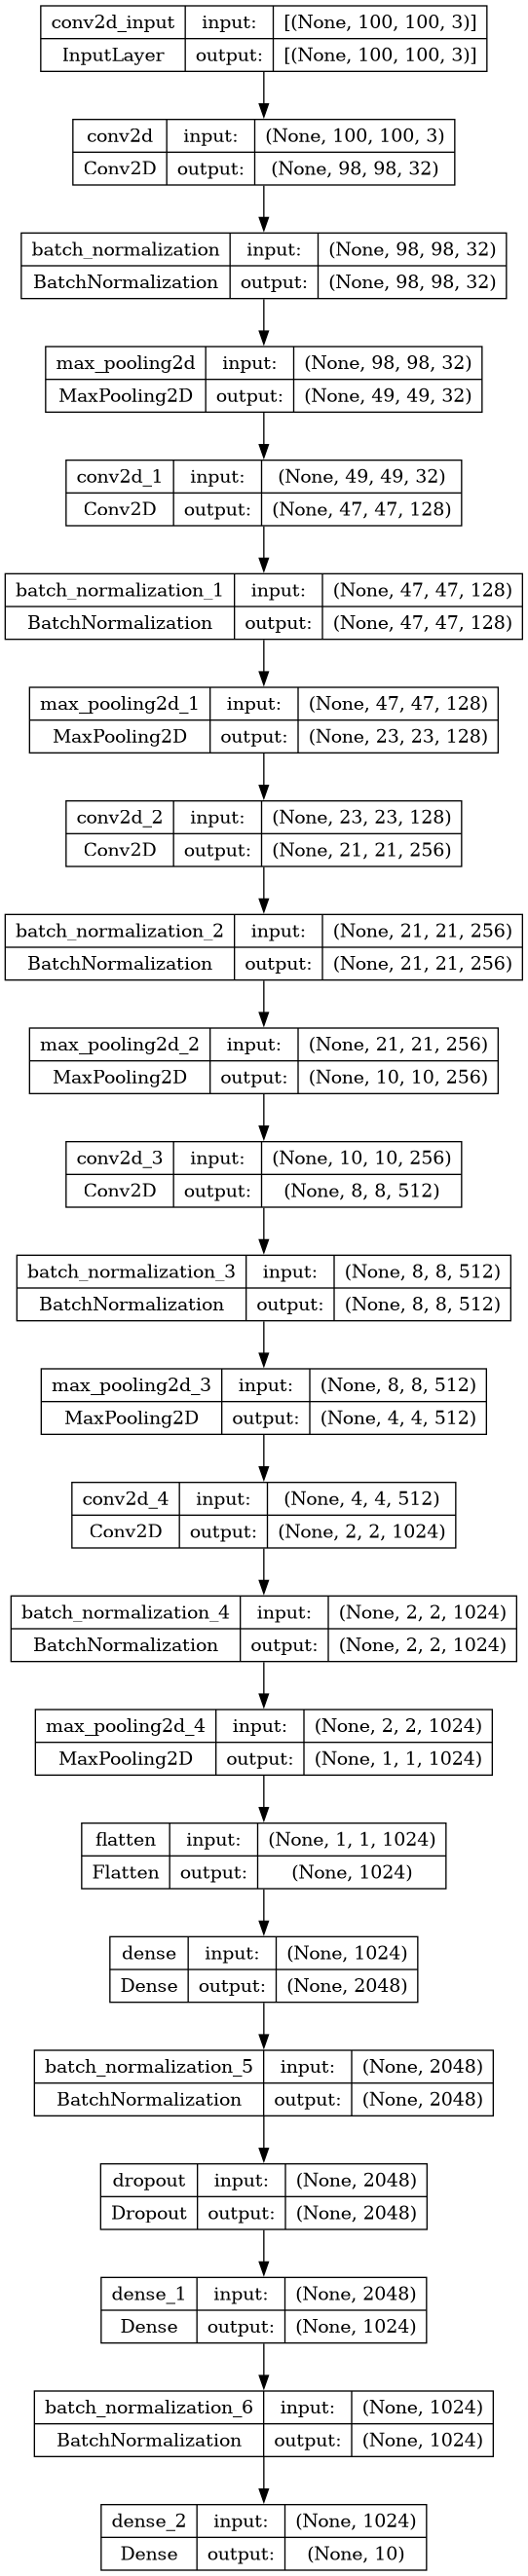

In [11]:
# Plot the model
plot_model(model, to_file='scm_v1_model.png', show_shapes=True)

In [12]:
# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 98, 98, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       36992     
                                                                 
 batch_normalization_1 (Bat  (None, 47, 47, 128)       512       
 chNormalization)                                                
                                                        

In [13]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,  # Increase the number of epochs for better convergence
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping]
)

Epoch 1/100
182/182 [==============================] - 32s 136ms/step - loss: 1.8960 - accuracy: 0.4026 - val_loss: 3.5657 - val_accuracy: 0.1087
Epoch 2/100
182/182 [==============================] - 24s 133ms/step - loss: 1.5524 - accuracy: 0.5052 - val_loss: 2.9238 - val_accuracy: 0.2055
Epoch 3/100
182/182 [==============================] - 24s 131ms/step - loss: 1.3026 - accuracy: 0.5750 - val_loss: 1.4812 - val_accuracy: 0.5144
Epoch 4/100
182/182 [==============================] - 24s 131ms/step - loss: 1.1688 - accuracy: 0.6177 - val_loss: 1.1364 - val_accuracy: 0.6277
Epoch 5/100
182/182 [==============================] - 24s 131ms/step - loss: 1.0624 - accuracy: 0.6566 - val_loss: 1.2378 - val_accuracy: 0.6195
Epoch 6/100
182/182 [==============================] - 24s 131ms/step - loss: 0.9891 - accuracy: 0.6713 - val_loss: 1.0534 - val_accuracy: 0.6715
Epoch 7/100
182/182 [==============================] - 24s 132ms/step - loss: 0.8864 - accuracy: 0.7096 - val_loss: 1.0954 -

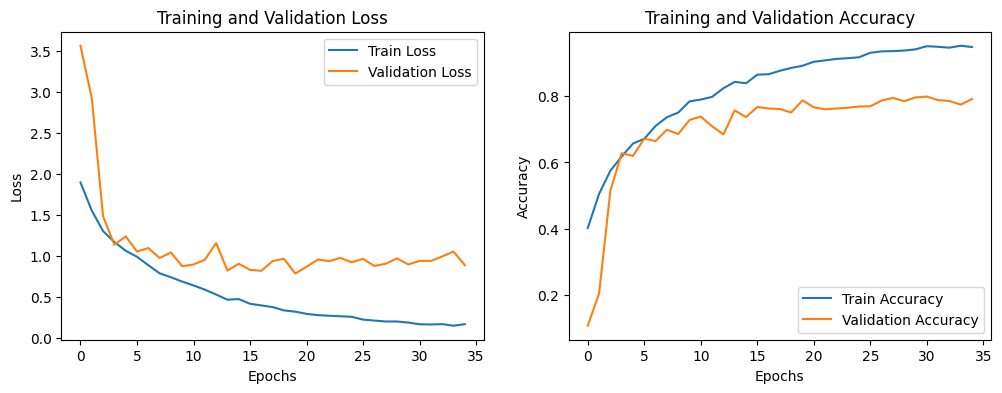

In [15]:
# Create subplots for loss and accuracy side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot training and validation loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('Training and Validation Loss')

# Plot training and validation accuracy
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].set_title('Training and Validation Accuracy')

plt.show()

In [16]:
# Generate predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

61/61 [==============================] - 3s 52ms/step


In [17]:
# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)

# Extract the accuracy from the evaluation result
accuracy = evaluation[1]

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

61/61 [==============================] - 3s 53ms/step - loss: 0.7790 - accuracy: 0.7905
Model Accuracy: 79.05%


In [18]:
# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)

# Extract the accuracy from the evaluation result
accuracy = evaluation[1]

# Print the accuracy
print(f"Model Test Accuracy: {accuracy * 100:.2f}%")

61/61 [==============================] - 3s 54ms/step - loss: 0.7790 - accuracy: 0.7905
Model Test Accuracy: 79.05%


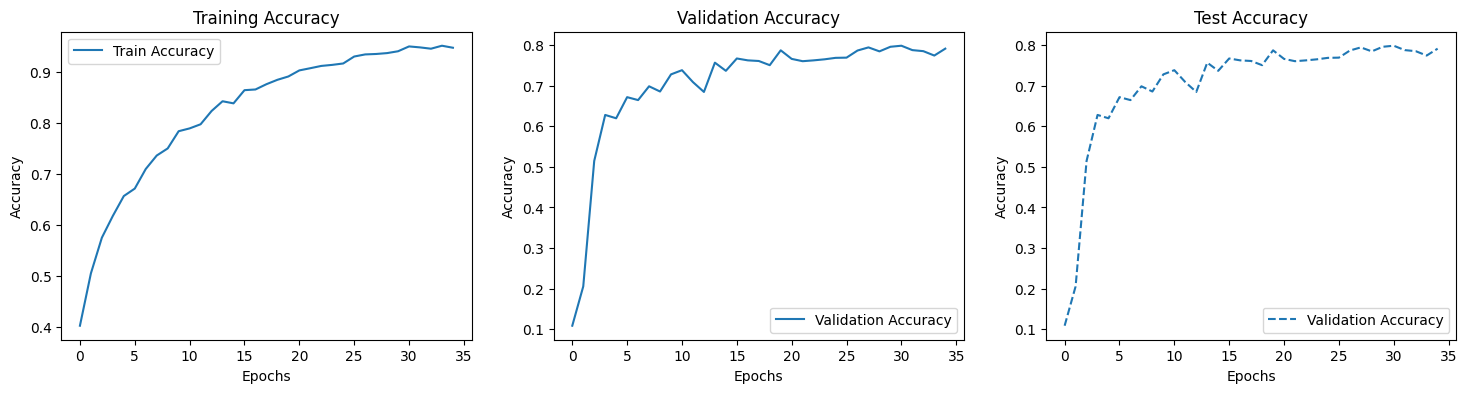

In [19]:
# Create subplots for training, validation, and test accuracy
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot training accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].set_title('Training Accuracy')

# Plot validation accuracy
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].set_title('Validation Accuracy')

# Plot test accuracy
axes[2].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')  # Assuming test accuracy is same as validation accuracy
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Accuracy')
axes[2].legend()
axes[2].set_title('Test Accuracy')

plt.show()

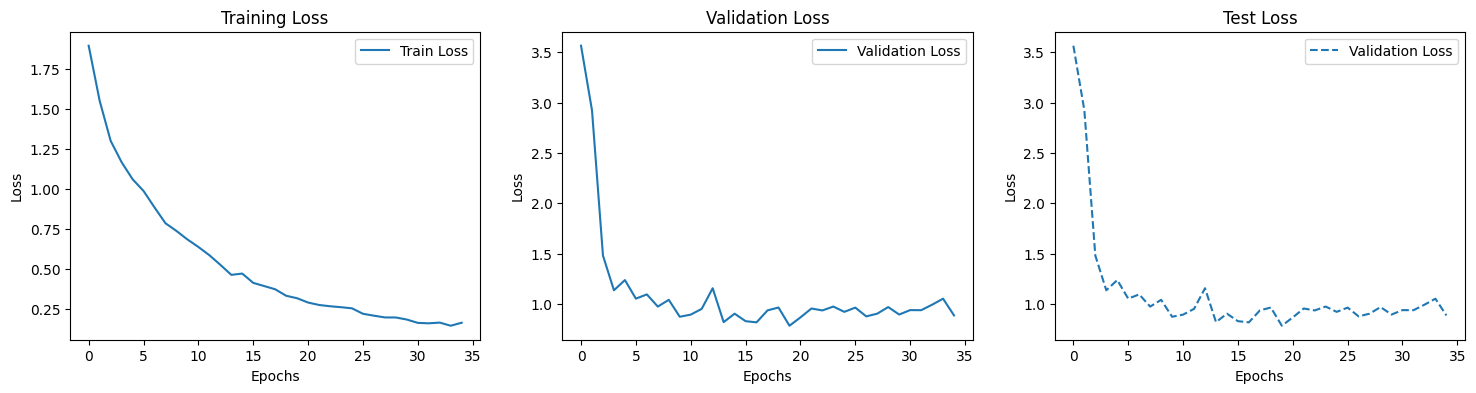

In [20]:
# Create subplots for training, validation, and test loss
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot training loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('Training Loss')

# Plot validation loss
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].set_title('Validation Loss')

# Plot test loss
axes[2].plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')  # Assuming test loss is same as validation loss
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Loss')
axes[2].legend()
axes[2].set_title('Test Loss')

plt.show()

In [21]:
# Set the batch size and image dimensions according to your model's input requirements
batch_size = 32
image_size = (100, 100)

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=False  # Important: Set shuffle to False to get predictions in order
)

# Generate predictions for the test data
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the generator
true_labels = test_generator.classes

# Get class labels and names
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

Found 1938 images belonging to 10 classes.
61/61 [==============================] - 3s 52ms/step
Classification Report:
                 precision    recall  f1-score   support

     BaldUakari       0.87      0.92      0.90       189
 EmperorTamarin       0.79      0.82      0.81       194
   GoldenMonkey       0.87      0.79      0.83       197
     GrayLangur       0.67      0.63      0.65       193
HamadryasBaboon       0.77      0.72      0.74       185
        Mandril       0.81      0.85      0.83       191
ProboscisMonkey       0.88      0.78      0.83       198
      RedHowler       0.66      0.85      0.74       198
   VervetMonkey       0.75      0.65      0.70       196
 WhiteFacedSaki       0.87      0.89      0.88       197

       accuracy                           0.79      1938
      macro avg       0.79      0.79      0.79      1938
   weighted avg       0.79      0.79      0.79      1938



Found 1938 images belonging to 10 classes.
61/61 [==============================] - 3s 52ms/step


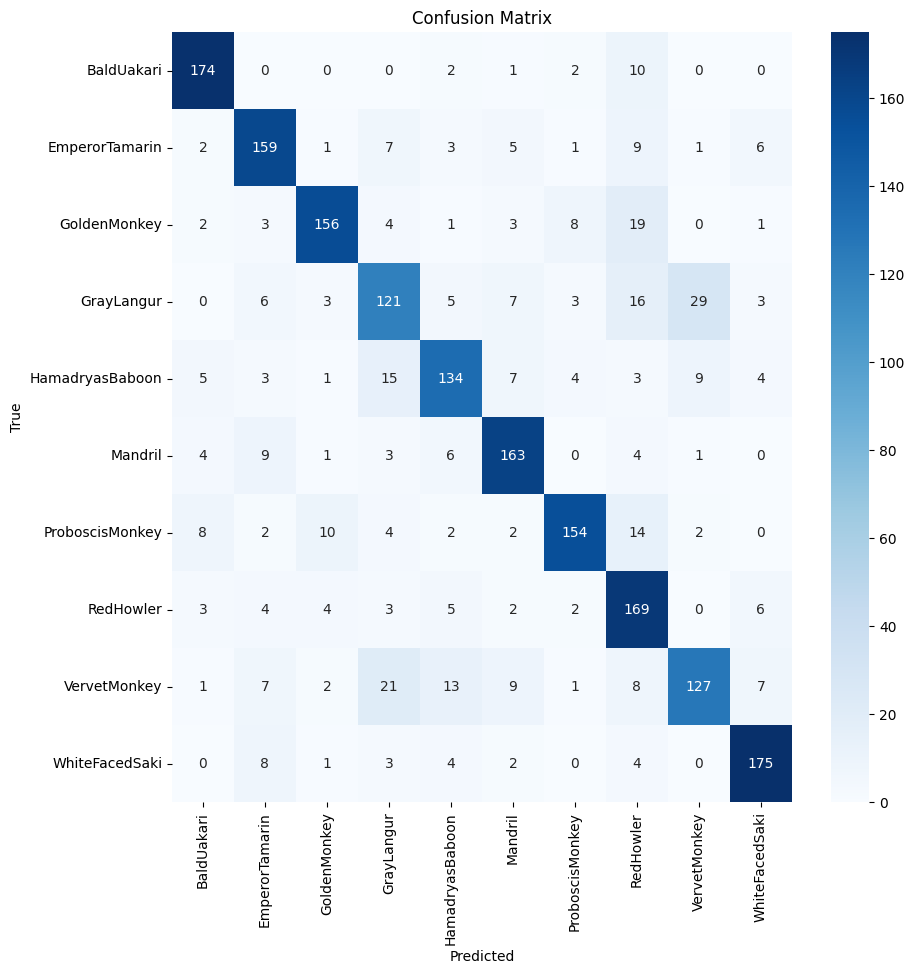

In [22]:
# Set the batch size and image dimensions according to your model's input requirements
batch_size = 32
image_size = (100, 100)

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=False  # Important: Set shuffle to False to get predictions in order
)

# Generate predictions for the test data
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the generator
true_labels = test_generator.classes

# Get class labels and names
class_labels = list(test_generator.class_indices.keys())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(len(class_labels), len(class_labels)))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

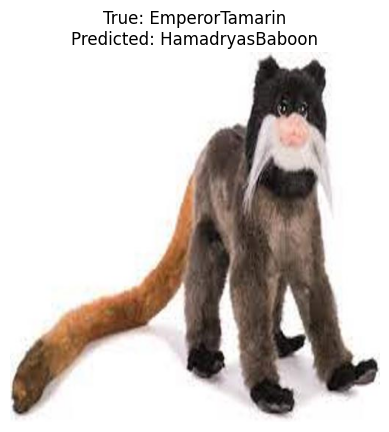

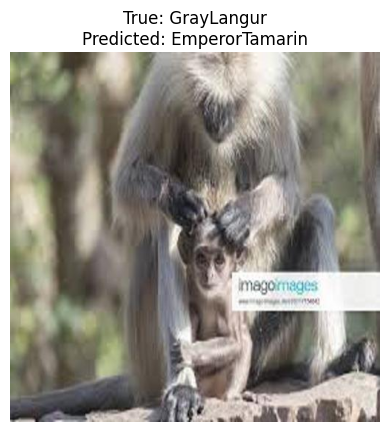

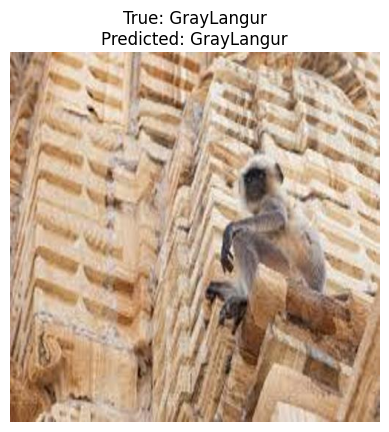

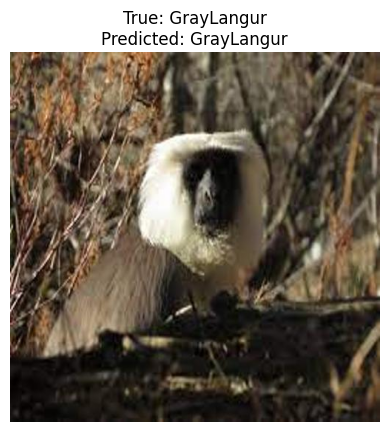

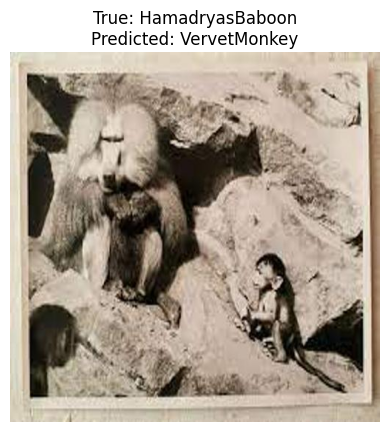

In [23]:
# Visualize some predictions
num_images_to_visualize = 5

for i in range(num_images_to_visualize):
    # Get a random index
    idx = np.random.randint(0, len(test_generator.filenames))
    
    # Load the image
    img_path = os.path.join(test_dir, test_generator.filenames[idx])
    img = plt.imread(img_path)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    
    # Get the true and predicted labels
    true_label = class_labels[true_labels[idx]]
    predicted_label = class_labels[predicted_labels[idx]]
    
    # Display the true and predicted labels
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.show()

In [24]:
# Save the model to a file
model.save('/kaggle/working/scmv1.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import shutil
z = '/kaggle/working/'
shutil.make_archive(z, 'zip', z)